# DataFrame 객체 대상 그룹화
- 형식) DF.groupby('집단변수').수학/통계 관련 함수() -> int타입의 칼럼에 적용 가능

In [2]:
import pandas as pd

tips = pd.read_csv('C:\\IITT\\4_Python-II\\workplace\\data\\tips.csv')
tips.info() # 244 x 7
tips.head()

# 팁 비율 : 파생 변수 생성 (사칙연산)
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips.head()

# 칼럼명 변경하기
# 변수 복제
tips['gender'] = tips['sex']
# 변수 제거
del tips['sex']
tips.head()

# tips = tips.rename({'sex':'gender'}, axis='columns') 특정 칼럼명 변경


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,smoker,day,time,size,tip_pct,gender
0,16.99,1.01,No,Sun,Dinner,2,0.059447,Female
1,10.34,1.66,No,Sun,Dinner,3,0.160542,Male
2,21.01,3.50,No,Sun,Dinner,3,0.166587,Male
3,23.68,3.31,No,Sun,Dinner,2,0.139780,Male
4,24.59,3.61,No,Sun,Dinner,4,0.146808,Female


# 1. 집단변수 1개 -> 전체 칼럼 그룹화

*****성별 빈도수 확인*****
gender
Female     87
Male      157
dtype: int64

*****성별에 따른 각 칼럼 합계*****
        total_bill     tip  size    tip_pct
gender                                     
Female     1570.95  246.51   214  14.484694
Male       3256.82  485.07   413  24.751136

*****성별에 따른 각 칼럼 평균*****
        total_bill       tip      size   tip_pct
gender                                          
Female   18.056897  2.833448  2.459770  0.166491
Male     20.744076  3.089618  2.630573  0.157651

*****성별에 따른 그룹별 요약 통계량*****
       total_bill                                                         \
            count       mean       std   min    25%    50%    75%    max   
gender                                                                     
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30   
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81   

          tip            ... size      tip_pct                                \
        count     

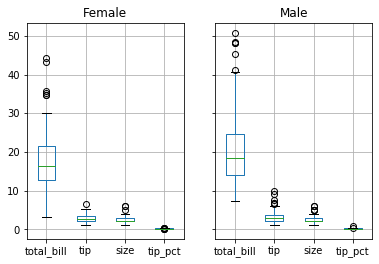

In [3]:
gender_grp = tips.groupby('gender')

# 그룹객체.함수()
# 각 그룹에 대한 빈도수 확인
print('*****성별 빈도수 확인*****')
print(gender_grp.size()) 

# 각 그룹에 대한 통계량 확인
print('\n*****성별에 따른 각 칼럼 합계*****')
print(gender_grp.sum())
print('\n*****성별에 따른 각 칼럼 평균*****')
print(gender_grp.mean())

len(dir(gender_grp)) # 호출가능한 멤버함수 확인 167개


# 그룹별 요약 통계량
print('\n*****성별에 따른 그룹별 요약 통계량*****')
print(gender_grp.describe()) # 수치 제공

print('\n*****그래프*****')
print(gender_grp.boxplot()) # 그래프 제공


# 2. 집단변수 1개 -> 특정 칼럼 그룹화

In [4]:
smoker_grp = tips['tip'].groupby(tips['smoker'])
print('흡연유무 빈도수')
print(smoker_grp.size()) # no:151 yes:93

print('흡연유무에 따른 tip')
print(smoker_grp.mean())

흡연유무 빈도수
smoker
No     151
Yes     93
Name: tip, dtype: int64
흡연유무에 따른 tip
smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


# 3. 집단변수 2개 -> 전체 칼럼 그룹화

In [5]:
gender_smoker_grp = tips.groupby(['gender','smoker'])

# 그룹 빈도수

print(gender_smoker_grp.size())
'''
gender  smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
'''
# 특정 변수 통계량
print('\n')
print(gender_smoker_grp.describe() )# 4x32
gender_smoker_grp['tip'].describe() #4x8
'''
               count      mean       std   min  25%   50%     75%   max
gender smoker                                                          
Female No       54.0  2.773519  1.128425  1.00  2.0  2.68  3.4375   5.2
       Yes      33.0  2.931515  1.219916  1.00  2.0  2.88  3.5000   6.5
Male   No       97.0  3.113402  1.489559  1.25  2.0  2.74  3.7100   9.0
       Yes      60.0  3.051167  1.500120  1.00  2.0  3.00  3.8200  10.0
[해설] 여성은 흡연자, 남성은 비흡연자가 팁 지불에 후하다.
'''

# 4. 집단변수 2개 -> 특정 칼럼 그룹화
gender_smoker_tip = tips['tip'].groupby([tips['gender'],tips['smoker']])
# groupby(['행','열'])
gender_smoker_tip.size().shape # 1d (4,)

# 집단별 tip의 합
gender_smoker_tip.sum().shape # 1d (4,)

# 1d -> 2d
gender_smoker_tip.sum().unstack().shape # 2d (2,2)
grp_2d = gender_smoker_tip.sum().unstack()

# 2d -> 1d
grp_2d.stack().shape # 1d (4,)


# 성별 vs 흡연유무 -> 교차분할표(빈도수)
grp_2d_size = gender_smoker_tip.sum().unstack()
print('\n')
print(grp_2d_size)

gender  smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
dtype: int64


              total_bill                                                      \
                   count       mean       std   min      25%    50%      75%   
gender smoker                                                                  
Female No           54.0  18.105185  7.286455  7.25  12.6500  16.69  20.8625   
       Yes          33.0  17.977879  9.189751  3.07  12.7600  16.27  22.1200   
Male   No           97.0  19.791237  8.726566  7.51  13.8100  18.24  22.8200   
       Yes          60.0  22.284500  9.911845  7.25  15.2725  20.39  28.5725   

                       tip            ... size      tip_pct            \
                 max count      mean  ...  75%  max   count      mean   
gender smoker                         ...                               
Female No      35.83  54.0  2.773519  ...  3.0  6.0    54.0  0.156921   
       Yes     44.30  33.0  2.931

In [6]:
# 문제) iris data를 사용하여 그룹화 시키기
iris = pd.read_csv('C:\\IITT\\4_Python-II\\workplace\\data\\iris.csv')
iris.groupby('Species').sum()

# 특정 변수 그룹화하기
iris['Sepal.Length'].groupby(iris['Species']).sum()



Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64